# Introduction <a class="anchor" id="0"></a>

In 2016, I have purchased a Samsung Galaxy S6 smartphone. Thanks to the preinstalled app "Samsung Health", I was able to track my daily number of steps and burned calories. This was very helpful because I was a very active student then. Seven years later, in 2023, I am still using the app but my daily life has significantly changed as I am now working as a data analyst, sitting at my desk almost all day long. This made me wonder :

* In 7 years, how many steps did I make in total ? 
* What year was I the most active ?
* How did my exercice habits change over time in terms of frequency and intensity of workouts ?

But since I do not own a smartwatch, only running and hiking activities are tracked. For instance, my swimming and dance workouts are not recorded in my Samsung Health data. Thus, I wanted to combine both my Samung Health *AND* Google Maps History Location data to:
* Get a full perspective on my workout activities (running, hiking, swimming and dancing)
* Link my geographical data to my workouts. The aim was to identify the places where I did long hikes for instance.

Because importing and cleaning the data was quite tedious for both data sources, the present Python code will focus only on the merging process of datasets. However, you may get more details on the preparation of each data source here : 
* [Samsung Health pedometer data](https://github.com/MargotMarchais/Samsung_Health_analysis)
* [Google Maps History Location data (public version)](https://github.com/MargotMarchais/Google_Maps_Swimming_Dance_workouts)


# Table of contents
* [Introduction](#0)
* [1.  Importing the cleaned Samsung Health and Google Maps History Location data as Pandas dataframes](#1)
 * [1.0. Python packages](#1.0)
 * [1.1. Samsung Health cleansed data](#1.1)
 * [1.2. Google Maps History Location cleansed data](#1.2)
* [2. Merging datasets](#2)
 * [2.1. Merging the swim and dance workouts to the pedometer data](#2.1)
 * [2.2. Merging the location history data to the pedometer data](#2.2)
* [3. Data cleaning and preparation](#3)
* [4. Insights from data visualization](#4)
 * [4.1. I burn on average 300 kcal / a day, with 400 to 500 kcal peaks in 2021 and 2022](#4.1)
 * [4.2. I burn most calories by simply walking](#4.2)
 * [4.3 Weight analysis: More exercice does not equate losing weight](#4.3)
* [5. Conclusion](#5)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1. Importing the cleaned Samsung Health and Google Maps History Location data as Pandas dataframes</h2> <a class="anchor" id="1"></a>
</div>

## 1.0. Packages that will be used  <a class="anchor" id="1.0"></a>

In [1]:
# Importing the relevant Python packages for the case study
import pandas as pd
import numpy as np

    # Dates focus
import datetime
from pandas.tseries.offsets import MonthEnd

    # Data viz focus
import matplotlib.pyplot as plt
import seaborn as sns
import string

    # Notebook format
from IPython.display import Image
from IPython.core.display import HTML

## 1.1. Samsung Health cleansed data  <a class="anchor" id="1.1"></a>


* *Structure*: Data are stored as a csv file ("Python_output") and contains 19 columns.
* *Information available* : The dataset provides information about my daily number of steps and calories burned.  <br>
* *Data granularity*: The information are summarized for each day in the dataset, with no duplicates. There are 2,440 rows (about 7 years of data).
* *Github repository detailing data preparation*: [Samsung Health pedometer data](https://github.com/MargotMarchais/Samsung_Health_analysis)

In [2]:
# Data import and glimpse
pedometer = pd.read_csv('C:/Users/margo/Documents/Documents/Formation/Github/Samsung_Health/pedometer_data.csv',
                index_col = False)

print(pedometer.shape)
pedometer.sort_values("clean_date", ascending = False).head(5)

(2440, 19)


,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,month,week,month_number,week_number,day_number,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand
2376,4775,2023-08-06,7000,5393,5393,0,3922.57030,163.229980,3.92257,2023,2023-08,2023-31,8,31,6,Sunday,5.393,5.393,0.0
2372,4766,2023-08-05,7000,6909,6909,0,5033.33000,210.399980,5.03333,2023,2023-08,2023-31,8,31,5,Saturday,6.909,6.909,0.0
2367,4753,2023-08-04,7000,5712,5712,0,4166.42040,174.869960,4.16642,2023,2023-08,2023-31,8,31,4,Friday,5.712,5.712,0.0
2363,4743,2023-08-03,7000,5875,5875,0,4293.95000,179.279970,4.29395,2023,2023-08,2023-31,8,31,3,Thursday,5.875,5.875,0.0
2361,4735,2023-08-02,7000,201,201,0,140.04999,6.799999,0.14005,2023,2023-08,2023-31,8,31,2,Wednesday,0.201,0.201,0.0


<div class="alert alert-block alert-info">
<b>Data understanding:</b> For each date ("clean date"), the following information are available: <br>
. Number of total steps ("step_count"), with a distinction between walk steps ("walk_step_count") and run steps ("run_step_count"). Information also available in thousand units. <br>
. Number of steps "recommended" from a health point of view
. Associated distance traveled during the day: in meters ("distance") and kilometers ("distance_km") <br>
. Number of calories burned during the day ("calorie") <br>
    
<em>Example on how to read the data: On October 5th 2022 (Wednesday), I reached 10,168 steps: I walked 10,163 steps and runned during 5 steps. In total, I thus walked 7.4 kms and burned 310 calories. This is more than the recommendation of 7,000 steps a day and I reached my goal of making 10,000+ steps a day. </em>

</div>

## 1.2. Google Maps History Location cleansed data <a class="anchor" id="1.2"></a>

There are 2 datasets to be imported:
* Dataset containing information about my swimming and dance workouts 
* Dataset providing the location where I was each day (excluding home and work)

### Dataset n°1 : Swim and dance workouts
* *Structure*: Data are stored as a csv file ("swim_dance_workouts.csv") and contains 3 columns.
* *Information available* : Dates when I went to the swimming pool or dance studio, and the duration of my workout as recorded by Google Maps. <br>
* *Data granularity*: The information are summarized for each day in the dataset, with no duplicates. There are only 165 rows because it records only the days I had a dance or swimming workout.
* *Github repository detailing data preparation*: [Google Maps History Location data (public version)](https://github.com/MargotMarchais/Google_Maps_Swimming_Dance_workouts)

In [3]:
# Data import and glimpse
swim_dance_workouts = pd.read_csv('C:/Users/margo/Documents/Documents/Formation/Github/Google_Maps_Location_History/swim_dance_workouts.csv',
                index_col = False)

print(swim_dance_workouts.shape)
swim_dance_workouts.sort_values("Date", ascending = False).head(5) 

(193, 3)


,Date,duration_minutes,Sports
192,2023-08-06,14.489117,SWIMMING
191,2023-08-05,9.534250,SWIMMING
190,2023-07-20,90.520350,SWIMMING
189,2023-07-15,76.606483,SWIMMING
188,2023-07-13,61.573300,SWIMMING


### Dataset n°2:
* *Structure*: Data are stored as a csv file ("final_data.csv") and contains 5 columns.
* *Information available* : The dataset provides information about the place I was the longest each day. <br>
* *Data granularity*: The information are summarized for each day in the dataset, with no duplicates. There are only 1388 rows because I excluded the dates that returned private information, such as my personal address or my work location.
* *Github repository detailing data preparation*: [Google Maps History Location data (public version)](https://github.com/MargotMarchais/Google_Maps_Swimming_Dance_workouts)

In [4]:
# Data import and glimpse
google_maps = pd.read_csv('C:/Users/margo/Documents/Documents/Formation/Github/Google_Maps_Location_History/day_zipcode.csv',
                index_col = False)

print(google_maps.shape)

google_maps.sort_values("Date", ascending = True).head(5)

(1380, 3)


,Date,Zipcode,City
0,2016-11-16,95021,CERGY-PONTOISE
1,2016-11-17,95021,CERGY-PONTOISE
2,2016-11-21,95021,CERGY-PONTOISE
3,2016-11-23,95021,CERGY-PONTOISE
4,2016-11-24,95021,CERGY-PONTOISE


<div class="alert alert-block alert-info">
<b>Data understanding:</b> For each date, I return the address where I was the longest that day (excluding my personal and work addresses). If there are no rows a given day, it means I stayed mostly at home and/or at work, and I do not display such rows for privacy reasons.
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2. Merging datasets</h2> <a class="anchor" id="1"></a>
</div>

Methodology: I start from my Samsung Health pedometer data. My objective is to enrich the dataset by:
* Adding the swimming and dance workouts information, and some estimated burned calories
* Adding the city where I was when I had long hikes

## 2.1. Merging the swim and dance workouts to the pedometer data <a class="anchor" id="2.1"></a>

In [5]:
# Methodology : Left join
sports_data = pedometer.merge(swim_dance_workouts, left_on = "clean_date", right_on = "Date", how = "left")
sports_data.sort_values("clean_date", ascending = False).head(5)

,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,...,month_number,week_number,day_number,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand,Date,duration_minutes,Sports
2376,4775,2023-08-06,7000,5393,5393,0,3922.57030,163.229980,3.92257,2023,...,8,31,6,Sunday,5.393,5.393,0.0,2023-08-06,14.489117,SWIMMING
2372,4766,2023-08-05,7000,6909,6909,0,5033.33000,210.399980,5.03333,2023,...,8,31,5,Saturday,6.909,6.909,0.0,2023-08-05,9.534250,SWIMMING
2367,4753,2023-08-04,7000,5712,5712,0,4166.42040,174.869960,4.16642,2023,...,8,31,4,Friday,5.712,5.712,0.0,NaN,NaN,NaN
2363,4743,2023-08-03,7000,5875,5875,0,4293.95000,179.279970,4.29395,2023,...,8,31,3,Thursday,5.875,5.875,0.0,NaN,NaN,NaN
2361,4735,2023-08-02,7000,201,201,0,140.04999,6.799999,0.14005,2023,...,8,31,2,Wednesday,0.201,0.201,0.0,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Success:</b> The sports column and workout durations were added to the Samsung Health pedometer data. <br>
    <em>Example: On October 5th, 2022 I made 10,168 steps in total and I did not do any dance nor swimming workout. On October 6th, 2022 though I walked 7,939 steps and had a swim workout. I stayed at the swimming pool for about 70 minutes.</em>
</div>

## 2.2. Merging the location history data to the pedometer data <a class="anchor" id="2.2"></a>

In [6]:
full_data = sports_data.merge(google_maps, left_on = "clean_date", right_on= "Date", how = "left")
full_data.sort_values("clean_date", ascending = False).head(5)

,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,...,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand,Date_x,duration_minutes,Sports,Date_y,Zipcode,City
2376,4775,2023-08-06,7000,5393,5393,0,3922.57030,163.229980,3.92257,2023,...,Sunday,5.393,5.393,0.0,2023-08-06,14.489117,SWIMMING,2023-08-06,75015,PARIS
2372,4766,2023-08-05,7000,6909,6909,0,5033.33000,210.399980,5.03333,2023,...,Saturday,6.909,6.909,0.0,2023-08-05,9.534250,SWIMMING,2023-08-05,75015,PARIS
2367,4753,2023-08-04,7000,5712,5712,0,4166.42040,174.869960,4.16642,2023,...,Friday,5.712,5.712,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2363,4743,2023-08-03,7000,5875,5875,0,4293.95000,179.279970,4.29395,2023,...,Thursday,5.875,5.875,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2361,4735,2023-08-02,7000,201,201,0,140.04999,6.799999,0.14005,2023,...,Wednesday,0.201,0.201,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Success:</b> The zipcode / town information (excluding home and work addresses) was added to the dataset <br>
    <em>Example: On October 5th, 2022 I stayed mostly in 1st arrondissement of Paris. 
        On October 6th, 2022 I stayed mostly in the 15th arrondissement of Paris.</em>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3. Data preparation</h2> <a class="anchor" id="3"></a>
</div>

In [7]:
#Remove useless columns that appeared during merges
full_data = full_data.drop(columns = ["Date_x", "Date_y"])

In [8]:
# Step 1: Add burned calories from the dance and swimming workouts
    # Hypothesis: I will assume that I burn 300 calories/hour when dancing and 400 calories/hour when swimming
    
full_data["calories_swim_dance"] = np.where(full_data["Sports"]=="SWIMMING", full_data["duration_minutes"]/60 * 400,
                                      np.where(full_data["Sports"]=="DANCE", full_data["duration_minutes"]/60 * 300, 0))

# Step 2: Compute the total number of calories burned during the day (calories from walking and running, and calories from swimming and dancing)
full_data["total_calories"] = full_data["calorie"] + full_data["calories_swim_dance"]
full_data.sort_values("clean_date", ascending=False).head(5)

# Step 3: Compute the number of days per month
full_data['last_day_month'] = pd.to_datetime(full_data['clean_date'], format="%Y-%m-%d") + MonthEnd(0)
full_data['max_day_month'] = full_data["last_day_month"].dt.day
full_data.head(5)


,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,...,walk_steps_thousand,run_steps_thousand,duration_minutes,Sports,Zipcode,City,calories_swim_dance,total_calories,last_day_month,max_day_month
0,1,2017-03-19,6000,8697,8679,18,6313.56,262.93997,6.31356,2017,...,8.679,0.018,NaN,NaN,NaN,NaN,0.0,262.93997,2017-03-31,31
1,4,2017-02-15,6000,5388,5388,0,3905.87,165.17000,3.90587,2017,...,5.388,0.000,NaN,NaN,13940,SINGAPORE,0.0,165.17000,2017-02-28,28
2,7,2017-02-09,6000,5402,5392,10,3919.18,167.84999,3.91918,2017,...,5.392,0.010,NaN,NaN,13940,SINGAPORE,0.0,167.84999,2017-02-28,28
3,8,2017-01-30,6000,15350,15286,64,11175.10,472.72995,11.17510,2017,...,15.286,0.064,NaN,NaN,06990,SINGAPORE,0.0,472.72995,2017-01-31,31
4,10,2016-12-17,6000,9854,785,9069,10431.82,712.87000,10.43182,2016,...,0.785,9.069,NaN,NaN,NaN,NaN,0.0,712.87000,2016-12-31,31


<div class="alert alert-block alert-success">
<b>Success:</b> The total calories and end of month columns were added. <br>
    <em>Example: On October 5th, 2022 I burned 310 calories, solely from walking. 
        On October 6th, 2022 I burned 722 calories: 246 from walking and 476 from swimming.</em>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4. Insights from data visualization</h2> <a class="anchor" id="4"></a>
</div>

## 4.1. I burn on average 300 kcal / a day, with 400 to 500 kcal peaks in 2021 and 2022 <a class="anchor" id="4.1"></a>

In [9]:
# Sum of calories burned every month
calories_df = full_data[full_data["clean_date"] >= '2017-01-01'] \
    [["year", "month_number", "calorie", "calories_swim_dance", "total_calories", "max_day_month"]] \
    .where(full_data["year"]!= 2016) 

calories_df = calories_df.groupby(["year", "month_number", "max_day_month"])[["calorie", "calories_swim_dance", "total_calories"]] \
    .sum().reset_index()

calories_df["cal_avg_run_walk_day"] = calories_df["calorie"]/ calories_df["max_day_month"]
calories_df["cal_avg_swim_dance_day"] = calories_df["calories_swim_dance"]/calories_df["max_day_month"]
calories_df["cal_avg_day"] = calories_df["total_calories"]/calories_df["max_day_month"]

calories_df.sort_values(["year", "month_number"], ascending = False).head(5)

,year,month_number,max_day_month,calorie,calories_swim_dance,total_calories,cal_avg_run_walk_day,cal_avg_swim_dance_day,cal_avg_day
79,2023,8,31,853.949879,160.155778,1014.105657,27.546770,5.166315,32.713086
78,2023,7,31,8713.899094,2615.696556,11329.595649,281.093519,84.377308,365.470827
77,2023,6,30,9399.698546,4004.665000,13404.363546,313.323285,133.488833,446.812118
76,2023,5,31,11304.018940,3245.738222,14549.757162,364.645772,104.701233,469.347005
75,2023,4,30,7052.178825,3557.303556,10609.482381,235.072628,118.576785,353.649413


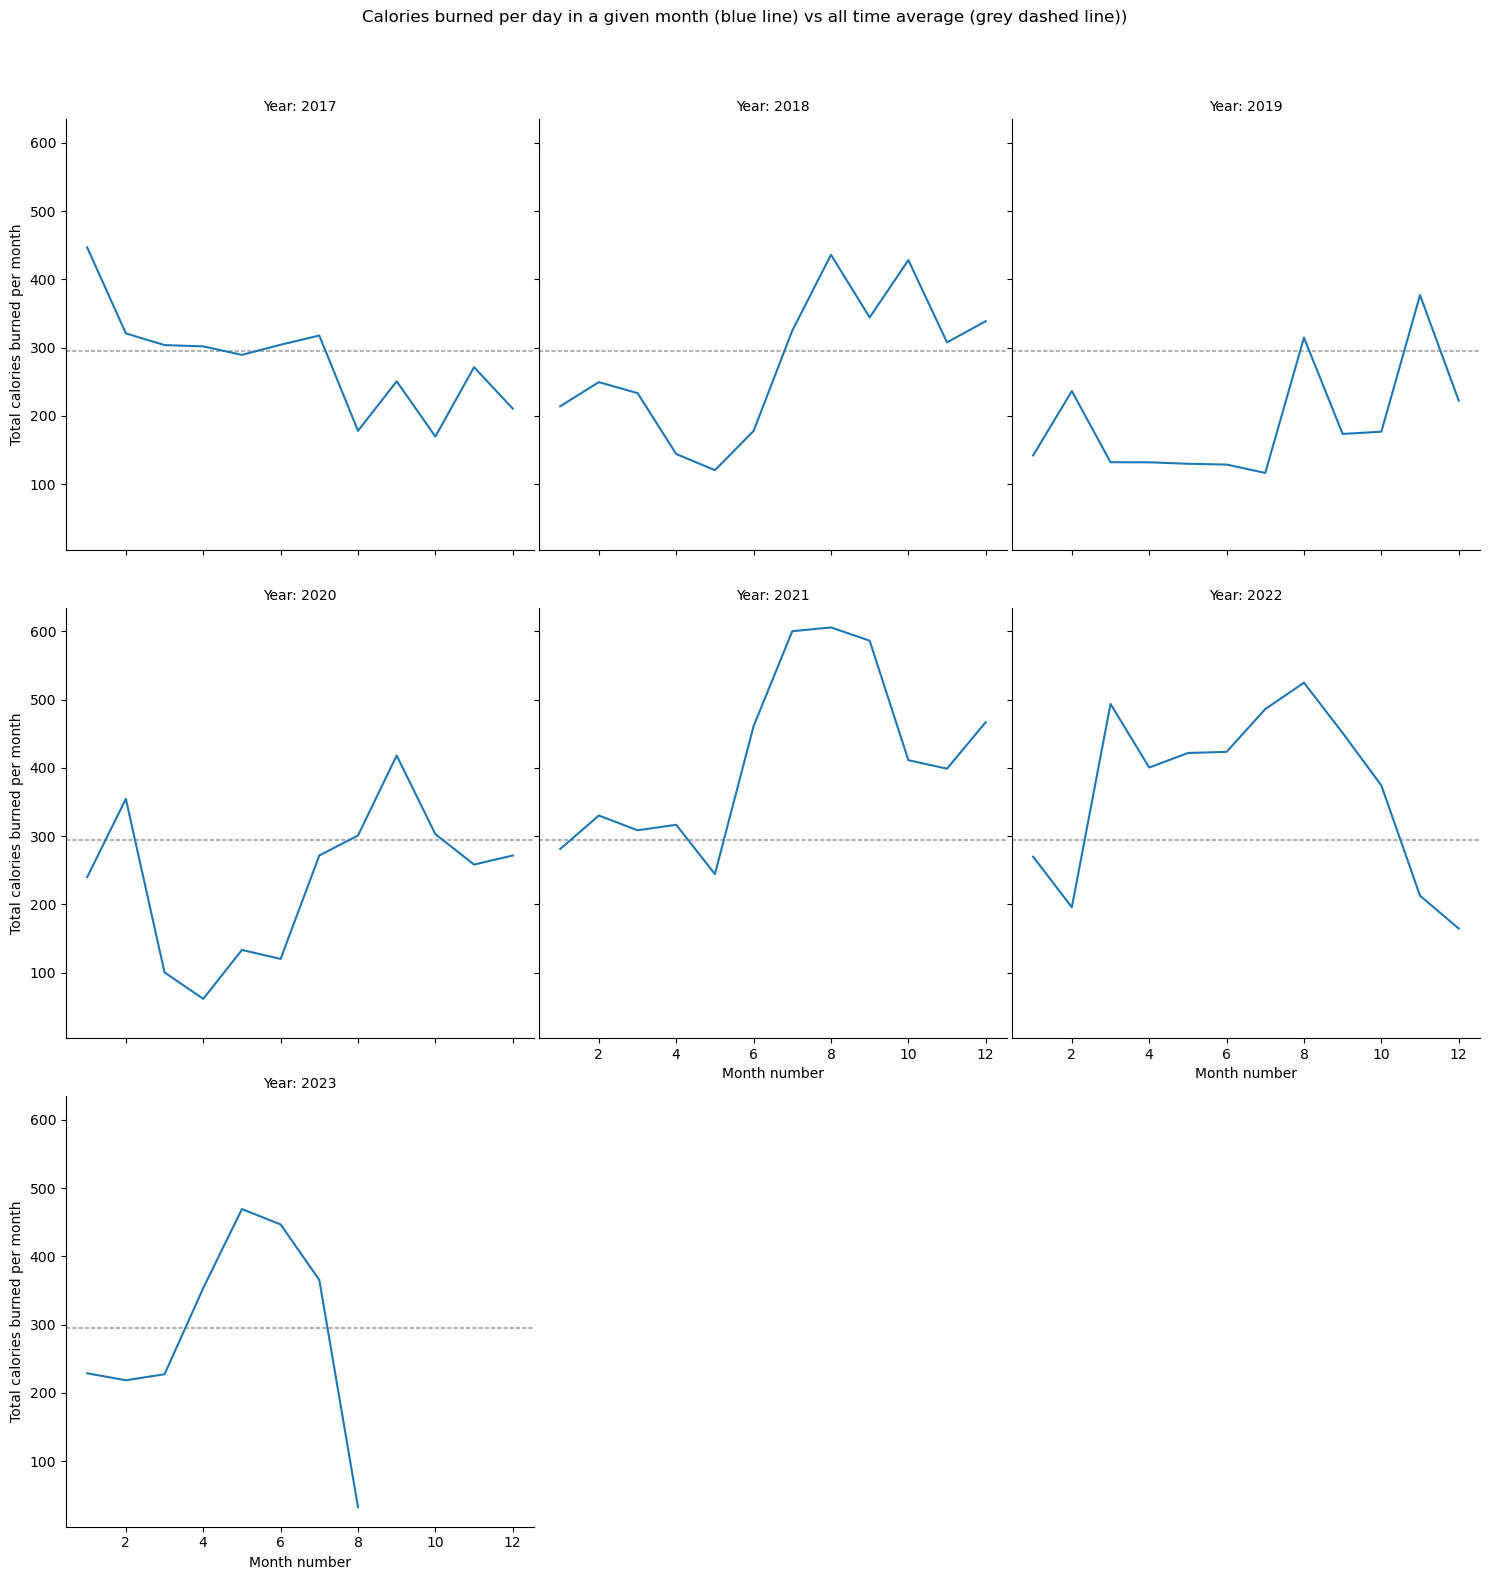

In [10]:
# Lineplot to see the evolution
g = sns.relplot(data=calories_df, x="month_number", y="cal_avg_day", 
            col = "year", kind = "line", markers = True, col_wrap= 3, palette = "blue") 

(g.map(plt.axhline, y=calories_df["cal_avg_day"].mean(), color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Month number", "Total calories burned per month")
  .set_titles("Year: {col_name}")
  .tight_layout(w_pad=0))

g.fig.suptitle('Calories burned per day in a given month (blue line) vs all time average (grey dashed line))', y=1.05)
plt.show()

## 4.2. I burn most calories by simply walking <a class="anchor" id="4.2"></a>

In [11]:
# Objective: Find how much each type of exercise contributes to calories burned
calories_df.columns = ['year', 'month_number', 'max_day', 'RUN_WALK', 'SWIM_DANCE', 'TOTAL', 
                       'AVG_RUN_WALK', 'AVG_SWIM_DANCE', 'AVG']

calories_long_df = calories_df.melt(["year", "month_number", "max_day"], var_name='Category', value_name='Calories')
calories_long_df[(calories_long_df["year"]==2022) & (calories_long_df["month_number"]==10)]

,year,month_number,max_day,Category,Calories
69,2022,10,31,RUN_WALK,10131.248942
149,2022,10,31,SWIM_DANCE,1469.052333
229,2022,10,31,TOTAL,11600.301275
309,2022,10,31,AVG_RUN_WALK,326.814482
389,2022,10,31,AVG_SWIM_DANCE,47.388785
469,2022,10,31,AVG,374.203267


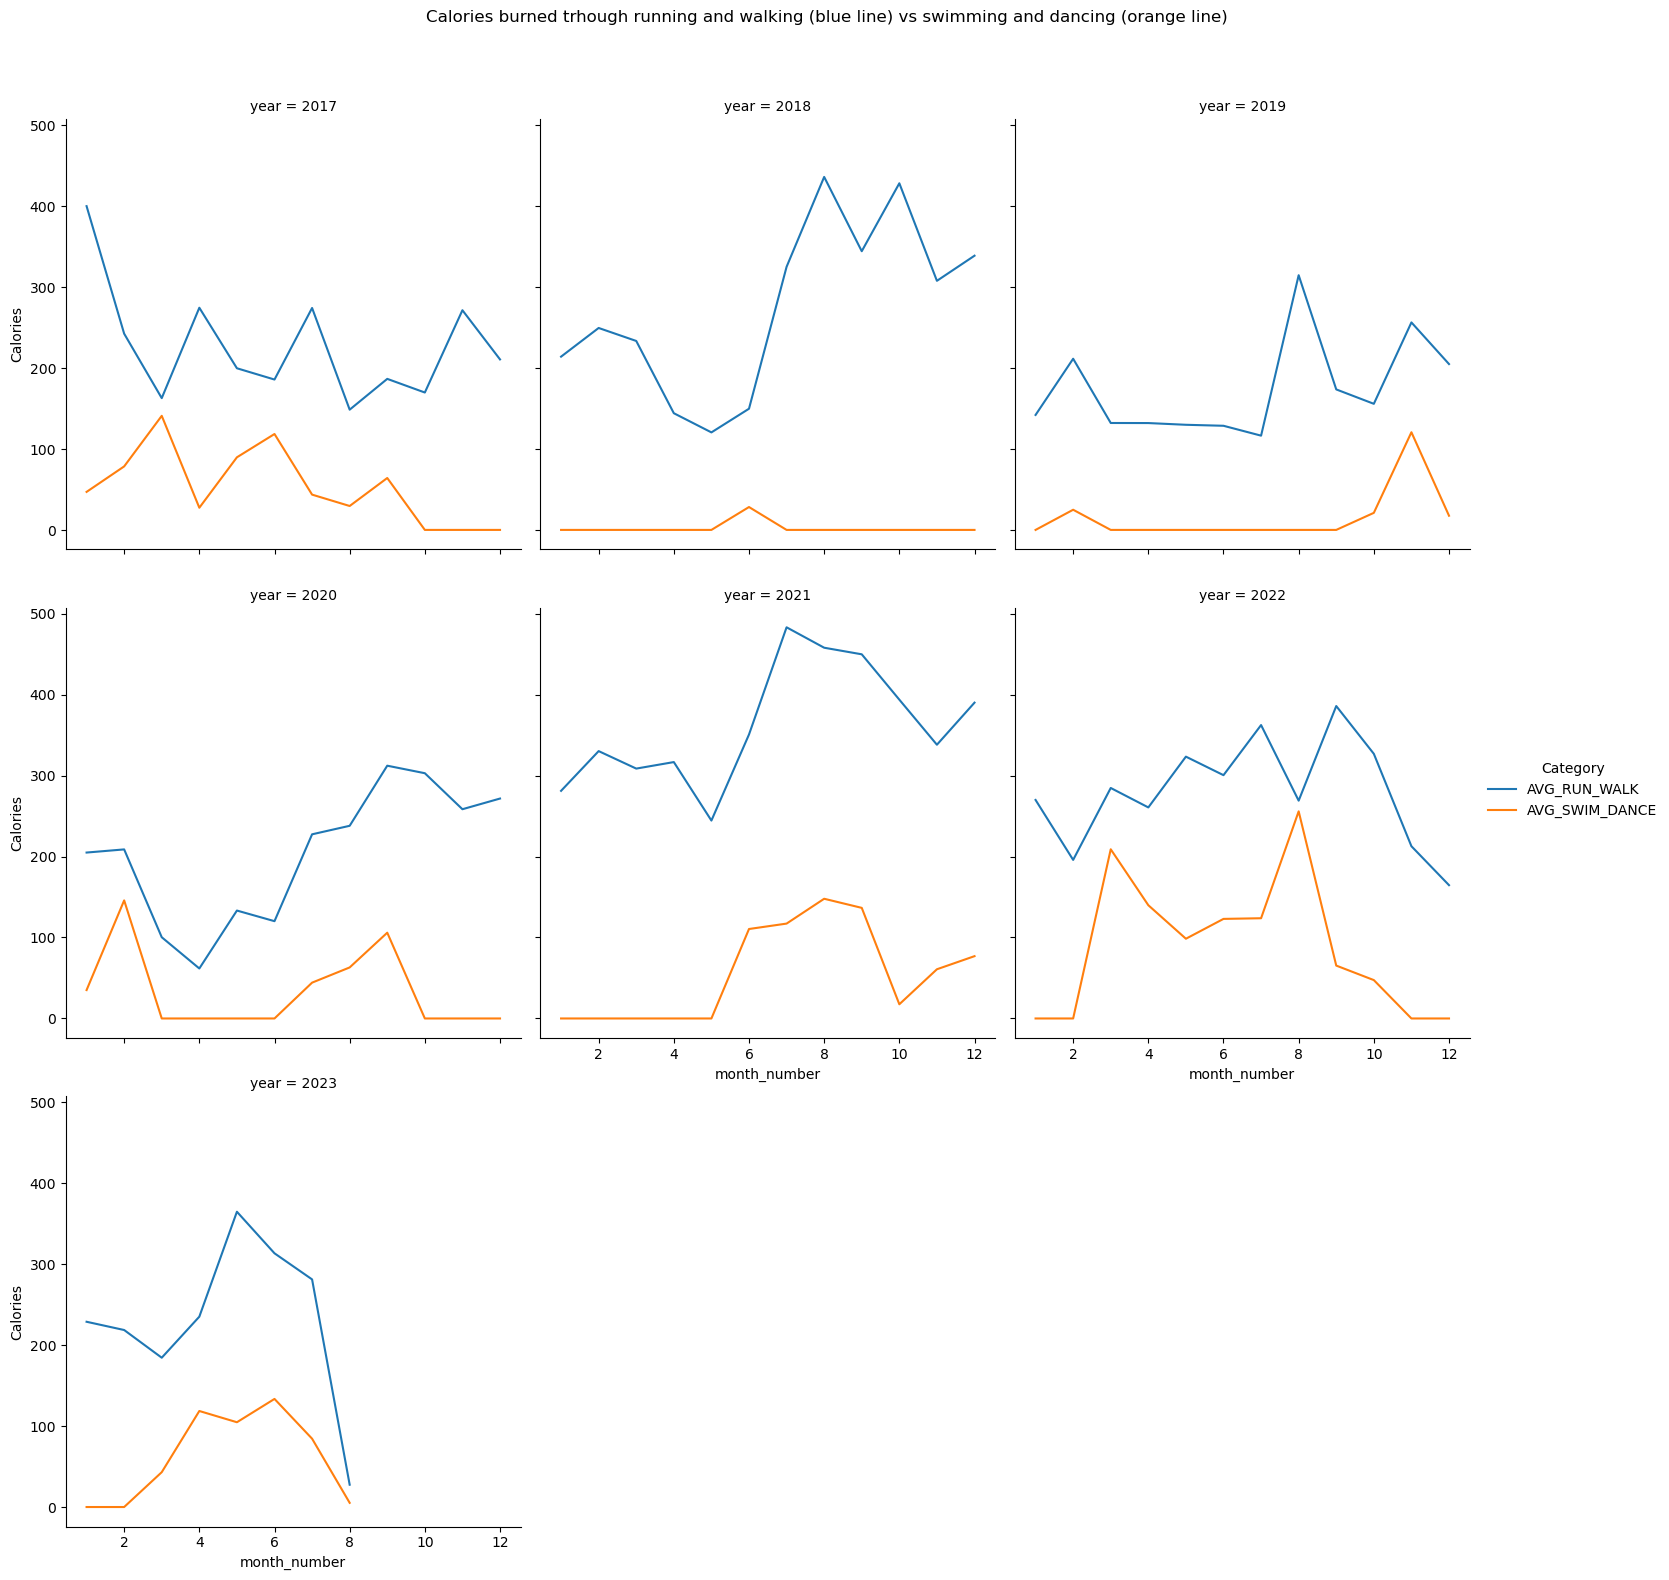

In [12]:
# Line plot
g = sns.relplot(data=calories_long_df[calories_long_df["Category"].isin(["AVG_RUN_WALK", "AVG_SWIM_DANCE"])],
            x="month_number", y="Calories", hue = "Category",
            col = "year", kind = "line", markers = True, col_wrap= 3) 

g.fig.suptitle('Calories burned trhough running and walking (blue line) vs swimming and dancing (orange line)', y=1.05)
plt.show()

## 4.3 Weight analysis: More exercice does not equate losing weight <a class="anchor" id="4.3"></a>

In [13]:
# Import my wieght data from Samsung Health
weight = pd.read_csv('C:/Users/margo/Documents/Documents/Quotidien/Samsung_Health/samsunghealth_margot.2m_20230806172745/com.samsung.health.weight.20230806172745.csv',
                     skiprows = 1,
                     index_col = False)

In [14]:
# Keep only the relevant columns
weight = weight[["start_time", "weight"]]

# Convert the start_time (string) to a date format
weight["date"] = pd.to_datetime(weight["start_time"])
weight["date"] = weight["date"].dt.date
weight["year"] = pd.to_datetime(weight["start_time"]).dt.year
weight["month"] = pd.to_datetime(weight["date"]).dt.month
weight.sort_values("date").head()

# Index weight (true values are masked) = 100%
reference_weight # hidden
weight["index"] = round(100 * weight["weight"] / reference_weight,2)
weight = weight[["date", "year", "month", "index"]]
weight.sort_values("date").head()

,date,year,month,index
75,2016-11-24,2016,11,100.00
0,2017-02-27,2017,2,96.67
9,2017-03-05,2017,3,96.51
68,2017-03-30,2017,3,98.89
225,2017-04-06,2017,4,98.89


In [15]:
# Compute mean statistics per month
weight_agg = weight.sort_values("date").groupby(["year", "month"])["index"].mean().reset_index()
weight_agg["year_month"] = weight_agg["year"].astype(str) + "-"+ weight_agg["month"].astype(str)
weight_agg.head()

,year,month,index,year_month
0,2016,11,100.000000,2016-11
1,2017,2,96.670000,2017-2
2,2017,3,97.700000,2017-3
3,2017,4,98.463333,2017-4
4,2017,10,104.285000,2017-10


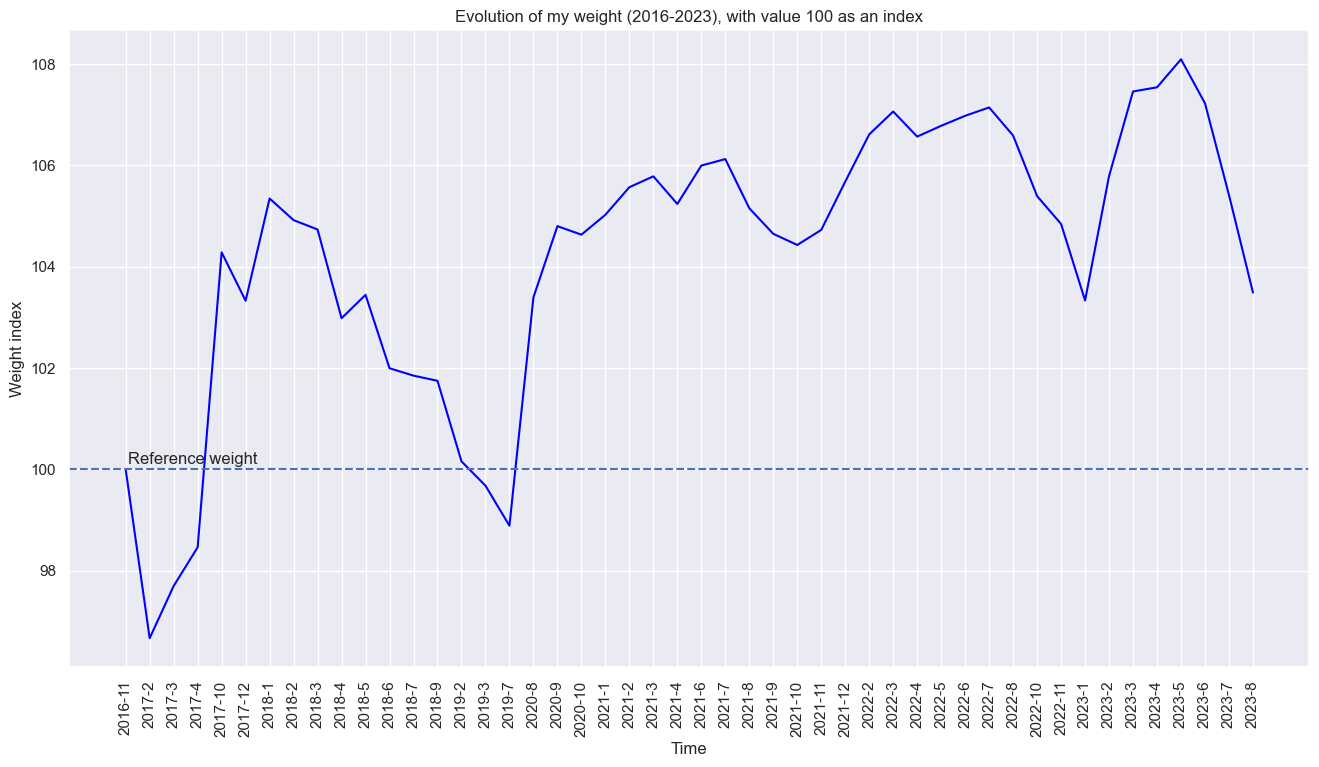

In [16]:
# Evolutions of my weight over time (disclaimer : not all months are represented)
sns.set_style("dark")
sns.set(rc={'figure.figsize':(16,8.27)})

g1 = sns.lineplot(data = weight_agg, x="year_month", y="index", color = "blue")
g1.set_title("Evolution of my weight (2016-2023), with value 100 as an index")
g1.set(xlabel = "Time", ylabel= "Weight index")

g1.axhline(100, ls='--')
g1.text(0.1,100.1, "Reference weight")

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.show()

<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
<b>Between 2016 and 2023, my weight has almost always been above the November 2016 baseline: it has been very difficult to maintain my weight (fluctuations up to 8%), and lose weight in the most recent period.</b>
    
<b>The periods I was able to lose weight were not necessarily the periods I was the most active:</b> 

* Between 2016 and end of 2017, I was living in Singapore where I could not eat out / had to home cook all my meals due to my food allergies. 
* In 2018 and 2019, I was living in Japan where I could not eat out as well, and then lived with my parents shortly when looking for my first job. All my meals were home cooked. 
* From 2020 onwards, I was impacted by the Covid19 crisis : I did not exercise as much (swimming pools closed, hiking groups banned, etc) and ate a lot at my company's canteen. Thus I gained a lot of weight.
* At the end of 2022, I was able to lose weight but it was because I caught the Covid disease.
</div>

In [17]:
# Join the exercise data and the weight data
pd.set_option('display.max_columns', 500)
weight_restrict = weight[["date", "index"]]
weight_restrict["date"] = weight_restrict["date"].astype(str)
full_data["clean_date"] = full_data["clean_date"].astype(str)

# Dataset that includes all workouts (walking, swimming, dancing) and weight data
full_data_weight = full_data.merge(weight_restrict, left_on = "clean_date", right_on= "date", how = "left")
full_data_weight.tail(10)

C:\Users\margo\AppData\Local\Temp\ipykernel_16772\992000607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_restrict["date"] = weight_restrict["date"].astype(str)


,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,month,week,month_number,week_number,day_number,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand,duration_minutes,Sports,Zipcode,City,calories_swim_dance,total_calories,last_day_month,max_day_month,date,index
2435,4887,2023-07-23,7000,27325,27285,40,19516.88,837.68994,19.51688,2023,2023-07,2023-29,7,29,23,Sunday,27.325,27.285,0.040,NaN,NaN,56000,VANNES,0.0,837.68994,2023-07-31,31,NaN,NaN
2436,4889,2023-07-24,7000,27197,27194,3,19308.84,830.14996,19.30884,2023,2023-07,2023-30,7,30,24,Monday,27.197,27.194,0.003,NaN,NaN,56000,VANNES,0.0,830.14996,2023-07-31,31,NaN,NaN
2437,4891,2023-07-25,7000,27772,27765,7,19711.47,855.77997,19.71147,2023,2023-07,2023-30,7,30,25,Tuesday,27.772,27.765,0.007,NaN,NaN,56000,VANNES,0.0,855.77997,2023-07-31,31,NaN,NaN
2438,4893,2023-07-26,7000,26286,26228,58,18780.00,809.89996,18.78000,2023,2023-07,2023-30,7,30,26,Wednesday,26.286,26.228,0.058,NaN,NaN,56000,VANNES,0.0,809.89996,2023-07-31,31,NaN,NaN
2439,4895,2023-07-27,7000,28269,28269,0,20231.47,856.87000,20.23147,2023,2023-07,2023-30,7,30,27,Thursday,28.269,28.269,0.000,NaN,NaN,56000,VANNES,0.0,856.87000,2023-07-31,31,NaN,NaN
2440,4897,2023-07-28,7000,5585,5583,2,4016.50,173.20998,4.01650,2023,2023-07,2023-30,7,30,28,Friday,5.585,5.583,0.002,NaN,NaN,75015,PARIS,0.0,173.20998,2023-07-31,31,2023-07-28,104.44
2441,4899,2023-07-29,7000,4287,4287,0,3079.18,131.04000,3.07918,2023,2023-07,2023-30,7,30,29,Saturday,4.287,4.287,0.000,NaN,NaN,75015,PARIS,0.0,131.04000,2023-07-31,31,2023-07-29,104.13
2442,4901,2023-07-30,7000,4324,4324,0,3004.81,138.53000,3.00481,2023,2023-07,2023-30,7,30,30,Sunday,4.324,4.324,0.000,NaN,NaN,NaN,NaN,0.0,138.53000,2023-07-31,31,2023-07-30,103.02
2443,4903,2023-07-30,7000,18,18,0,12.50,0.58000,0.01250,2023,2023-07,2023-30,7,30,30,Sunday,0.018,0.018,0.000,NaN,NaN,NaN,NaN,0.0,0.58000,2023-07-31,31,2023-07-30,103.02
2444,4905,2023-08-01,7000,3893,3893,0,2822.49,119.36999,2.82249,2023,2023-08,2023-31,8,31,1,Tuesday,3.893,3.893,0.000,NaN,NaN,75015,PARIS,0.0,119.36999,2023-08-31,31,2023-08-01,103.17


In [18]:
# Compute descriptive statistics per month (mean)
desc = full_data_weight.groupby("month")[["index", "total_calories"]].mean().reset_index()
desc

,month,index,total_calories
0,2016-11,NaN,259.162000
1,2016-12,NaN,269.500994
2,2017-01,NaN,446.766724
3,2017-02,96.670000,320.751564
4,2017-03,97.700000,303.613770
...,...,...,...
77,2023-04,107.542500,353.649413
78,2023-05,108.095714,469.347005
79,2023-06,107.226471,446.812118
80,2023-07,105.409600,365.470827


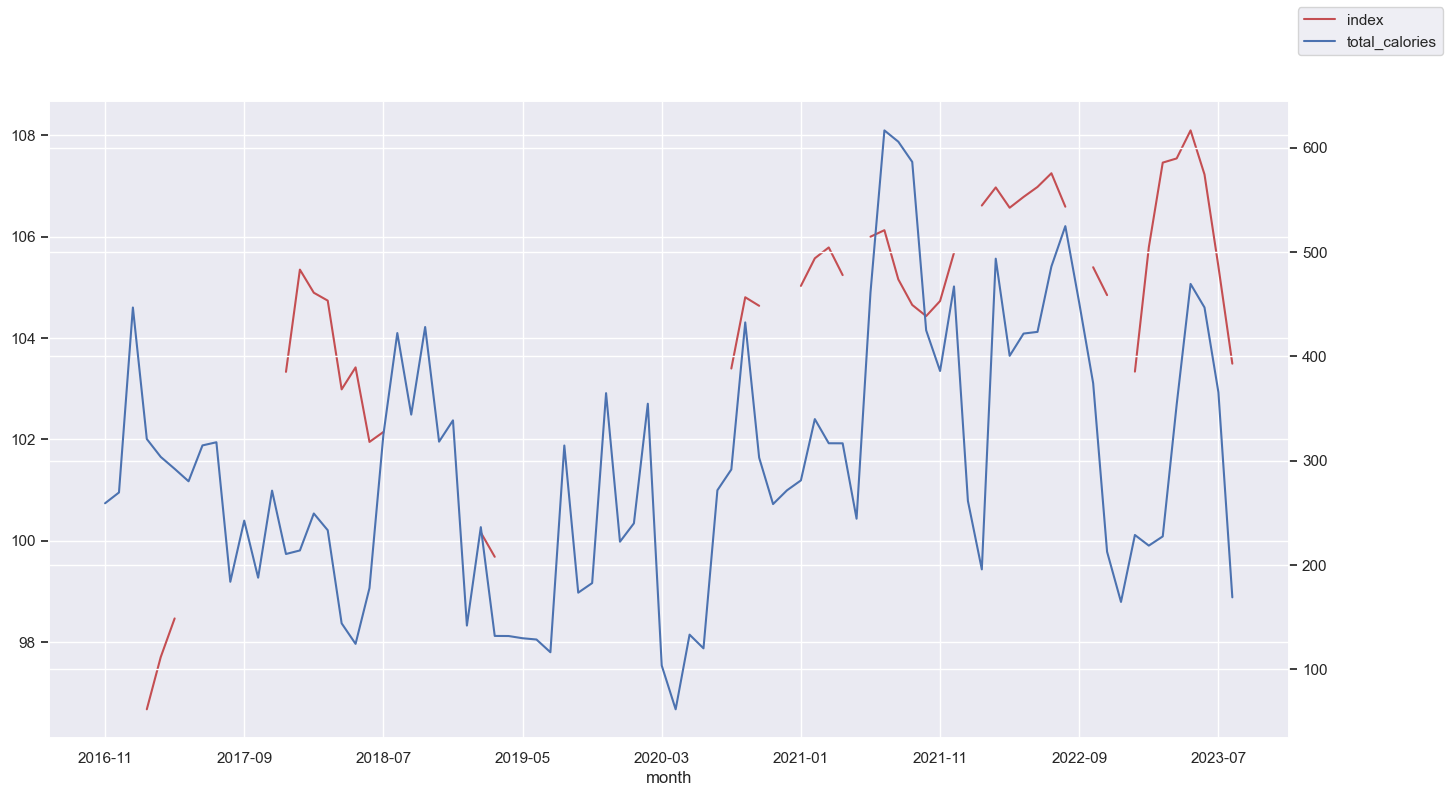

In [19]:
# Graph with double axis
ax = desc.plot(x="month", y="index", legend=False, color = 'r')
ax2 = ax.twinx()
desc.plot(x="month", y="total_calories", ax=ax2, legend=False, color="b")
ax.figure.legend()
plt.show()

<div class="alert alert-block alert-warning">
<b>Learnings:</b> <b>Unfortunately, the correlations between my weight and my burned calories through exercise are quite difficult to draw because there are too many Null values for my weight data </b>. There are indeed many months when I did not weigh myself, especially in the early period.

In the most recent period, the evolutions of the two curves seem similar yet. Ihe more exercise I do, the more I weight (at the exception of the summer 2021). The less exercise I do, the less I weight (ex: Summer 2018, September 2019,...). I do not believe it is because I gain / lose muscle (body fat indicators would be useful to test this hypothesis). I think it is rather to my bigger / smaller appetite, especially when I tend to swim regularly.
</div>

In [20]:
# Last step : Export results to Excel (csv format)
full_data_weight.to_csv("full_data_weight.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5. Conclusion</h2> <a class="anchor" id="5"></a>
</div>

This concludes the third and last part of my case study on Samsung health and Google Maps indicators.

_Previous steps :_
* [Samsung Health pedometer data](https://github.com/MargotMarchais/Samsung_Health_analysis)
* [Google Maps History Location data (public version)](https://github.com/MargotMarchais/Google_Maps_Swimming_Dance_workouts)

_Achievements :_
* I was able to get a full perspective on my workout activities (running, hiking, swimming and dancing). 
Indeed, I could track my total number of steps made during the last 7 years, as well as my other workouts such as swimming and dancing in a single database. 
I could also track the total number of calories burned and my weight fluctuations (when measured)
* Link my geographical data to my workouts

_Go further :_
* The results of the 3 Jupyter notebooks were used for building an interactive Tableau dahsboard that provides a comprehensive view of my workout activity over time
* A non-technical case study is also available on my blog to provide further explanations about the why of the project and my methodology
